#Prerequisites

In [128]:
import pandas as pd
import numpy as np

In [129]:
with open("/content/Autolib_dataset (2).csv", "r") as d:
  car = pd.read_csv(d)

In [130]:
car

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


#BUSINESS UNDERSTANDING

The goal of this project is to expand the ride sharing services that the company provides which is currently biased on the blue car.

Objectives are set out to see its [bluecar] popularity. How the new models or other models are compared to the bluecar which are currently the pinnacle of the business.

The usage of bluecar will be investigated. The distribution of said Bluecar with respect to the address and the stations will be investigated. 

Also, the usage of the vehicles based on the time of pick ups and drop off shall be investigated.

#DATA UNDERSTANDING

#####Researched data

The information that could be found on the data is as follows:


1.   Bluecar, Utilib and the Utilib14 are vehicles on a subscription service within paris
2.   Information about the types of data columns within the dataset which are as follows:
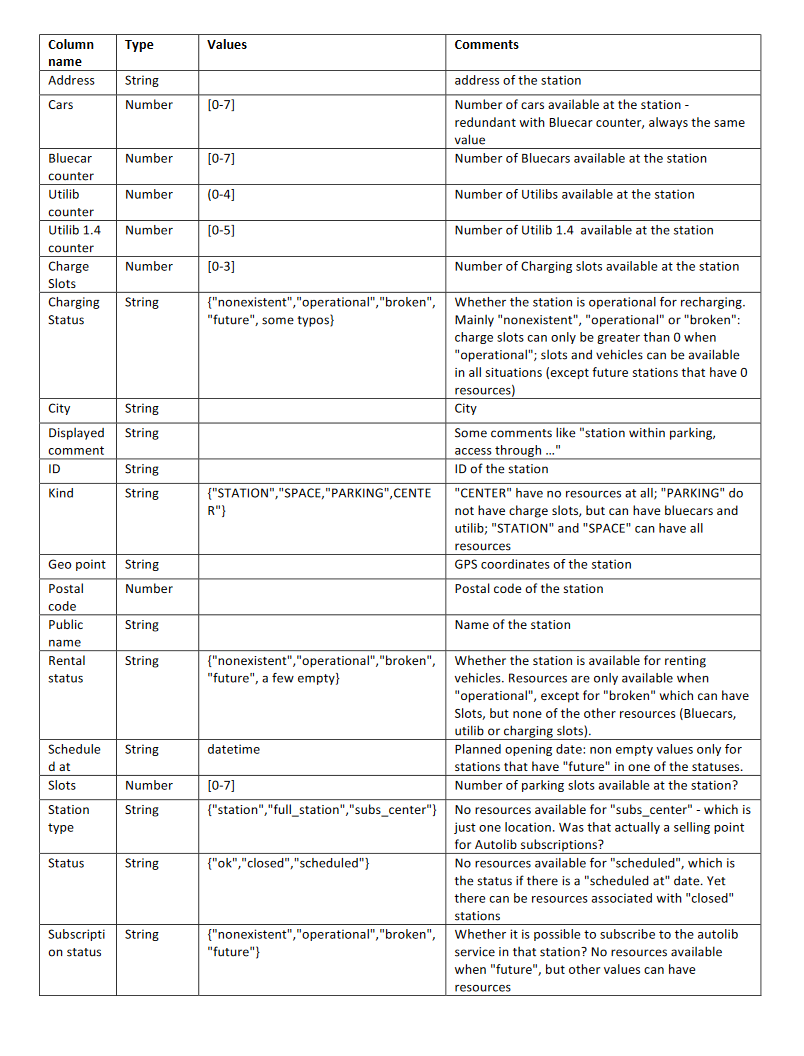



#####Ranges and possible data types

First, all the possible data on all the necessary columns are looked at.

In [131]:
#makes a dataset of the data types of each column of cars [primary dataset]
#alongside indicates the number of unique records that are present in the column

w = car.dtypes
ty = pd.DataFrame(w)
ty

x  = car.columns

ty['unique'] = 0
ty.columns = ['data_type', 'unique']
for e , row in ty.iterrows():
  r = car[e].unique ()
  ty.loc [e , 'unique'] = len(r)
ty

,data_type,unique
Address,object,1104
Cars,int64,8
Bluecar counter,int64,8
Utilib counter,int64,3
Utilib 1.4 counter,int64,4
Charge Slots,int64,3
Charging Status,object,3
City,object,88
Displayed comment,object,26
ID,object,1105


From the above we can at least derive that the data may require little to no cleaning. Due to the closeness in the number of unique records; there may be a possibility of a direct correlation to the columns: Address, ID, Geo-point and Public name since the number of unique records in them are nearly identical. Eliminating the data_type object shows that within some columns; there are state indicators which will further be investigated.

In [132]:
#Filters the object based data types of the above dataset and for the ones that are within reason lists the possible values that the
#column holds

ty1 = ty
rt = ty1[ty1['data_type'] == 'object']

for e , row in rt.iterrows():
  if row['unique'] < 30:
    f = str(car[e].unique())
    rt.loc[e, 'list'] = f
  else:
    rt.loc[e, 'list'] = "Too many"

rt

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,data_type,unique,list
Address,object,1104,Too many
Charging Status,object,3,['nonexistent' 'operational' 'broken']
City,object,88,Too many
Displayed comment,object,26,"[nan 'Station en parking (niv -1), accÃ¨s 37 r..."
ID,object,1105,Too many
Kind,object,4,['STATION' 'PARKING' 'SPACE' 'CENTER']
Geo point,object,1105,Too many
Public name,object,1105,Too many
Rental status,object,4,['operational' 'broken' 'future' 'nonexistent']
Scheduled at,object,9,[nan '2016-07-27T15:32:21' '2016-07-05T13:10:0...


The above section shows the columns with status of the data. An example given is that the status can be either of 3 ['ok' 'closed' 'scheduled']. This gives a better understanding of the records.

In [133]:
#gives the numerical range of the data that is within the main dataset

ty1 = ty
tr = ty[ty['data_type'] != 'object']

tr ['Minimum'] = 0
tr ['Maximum'] = 0
for w , row in tr.iterrows():
  tr.loc[w,'Maximum'] = car[w].max()
  tr.loc[w,'Minimum'] = car[w].min()
tr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,data_type,unique,Minimum,Maximum
Cars,int64,8,0,7
Bluecar counter,int64,8,0,7
Utilib counter,int64,3,0,2
Utilib 1.4 counter,int64,4,0,3
Charge Slots,int64,3,0,2
Postal code,int64,107,75001,95880
Slots,int64,8,0,7
year,int64,1,2018,2018
month,int64,1,4,4
day,int64,9,1,9


The above shows the ranges of all the numerical data in the dataset. This is there may be none to seven slots within the data set.

#DATA PREPARATION

The data shall be searched for any null values within its rows. The data below searches using the columns for occurence of null values that may cause inaccuracies while the null values are being searched.

####Data cleaning

In [134]:
#Get the aggregate of the null values in the data set within the columns

g = car

h = g.columns
for j in h:
  e = g[j].isnull().values.sum()
  print (j + '\t' + str(e))

Address	0
Cars	0
Bluecar counter	0
Utilib counter	0
Utilib 1.4 counter	0
Charge Slots	0
Charging Status	0
City	0
Displayed comment	4889
ID	0
Kind	0
Geo point	0
Postal code	0
Public name	0
Rental status	0
Scheduled at	4953
Slots	0
Station type	0
Status	0
Subscription status	0
year	0
month	0
day	0
hour	0
minute	0


In [135]:
#Drops the columns that posses null values
g.drop(columns = ['Displayed comment' , 'Scheduled at'], inplace=True)

In [136]:
#Counter checks for any columns with null values
g = car

h = g.columns
for j in h:
  e = g[j].isnull().values.sum()
  print (j + '\t' + str(e))

Address	0
Cars	0
Bluecar counter	0
Utilib counter	0
Utilib 1.4 counter	0
Charge Slots	0
Charging Status	0
City	0
ID	0
Kind	0
Geo point	0
Postal code	0
Public name	0
Rental status	0
Slots	0
Station type	0
Status	0
Subscription status	0
year	0
month	0
day	0
hour	0
minute	0


Duplicates are then sought for within the dataset and deleted from the records.

In [137]:
g = g.drop_duplicates()
g

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


Due to the lack of clarity of the data; a solution was found that the records are a snapshot of each parking allocated to the vehicles of the company [bluecar and the two Utilib]. Whereby in every station there are varied slots available for the vehicles to be parked and possibly to be charged. The usage data was thus retrieved from getting the difference of when the data of the vehicles present and the next state of the parking.

Elaborated, if at a given time say morning there was a vehicle in the parking, then 6 hours later the vehicle is not present, an assumption is made that the very vehicle has been taken for use; under the subscription.

This forced the method of the count to be based on the state of the difference in number of vehicles from one record to the next based on a chronological order.

####Data processing

In [138]:
a = g

In [139]:
#adding of extra columns to the data set

a['delta_slots'] = 0
a['delta_cars'] = 0
a['delta_expansion'] = 0
a['delta_blue'] = 0
a['delta_utilib'] = 0
a['delta_utilib14'] = 0
a['total_cars'] = a['Bluecar counter'] + a['Utilib counter'] + a['Utilib 1.4 counter']


In [140]:
tryu = g.columns

for r in range (len(tryu)):
  print (str(r)+'\t'+ tryu[r])

0	Address
1	Cars
2	Bluecar counter
3	Utilib counter
4	Utilib 1.4 counter
5	Charge Slots
6	Charging Status
7	City
8	ID
9	Kind
10	Geo point
11	Postal code
12	Public name
13	Rental status
14	Slots
15	Station type
16	Status
17	Subscription status
18	year
19	month
20	day
21	hour
22	minute
23	delta_slots
24	delta_cars
25	delta_expansion
26	delta_blue
27	delta_utilib
28	delta_utilib14
29	total_cars


In [141]:
#Groups the data by public name [station] then arrages the small grouped data by chronological order
#pastes the items in the dataset a which is a cleaned version of the primary data set

i = g['Public name'].unique()
for j in i:
  jk =  a[a['Public name'] == j]
  b = jk.sort_values(['day','hour', 'minute'])
  for v in range (1,len(b)):
    b.iloc[v,23] = b.iloc[v-1,14] - b.iloc[v,14]
    b.iloc[v,24] = b.iloc[v-1,1] - b.iloc[v,1]
    b.iloc[v,26] = b.iloc[v-1,2] - b.iloc[v,2]
    b.iloc[v,27] = b.iloc[v-1,3] - b.iloc[v,3]
    b.iloc[v,28] = b.iloc[v-1,4] - b.iloc[v,4]
  for r , row in b.iterrows():
    a.loc[r,'delta_slots'] = row['delta_slots']
    a.loc[r,'delta_cars'] = row['delta_cars'] 
    a.loc[r,'delta_blue'] = row['delta_blue'] 
    a.loc[r,'delta_utilib'] = row['delta_utilib'] 
    a.loc[r,'delta_utilib14'] = row['delta_utilib14']   

In [142]:
a

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2,0,0,0,0,0,0
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2,-2,0,-2,0,0,6
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,-1,1,0,1,0,-2,5
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,-1,0,0,0,-1,1,4
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,-1,1,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26,-3,3,0,3,0,0,2
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56,0,-2,0,-2,0,0,4
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1,1,-1,0,-1,0,0,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27,0,0,0,0,0,0,2


#ANALYSIS

For the analysis, the primary source of information that was mentioned above is taken into account. When a vehicle is taken from the parking [assuming that all the records indicate usage by subscribers] which according to the data preparation will result in a negative value in the prepared data. The vehicles brought back into the parking are added and it is assumed that the vehicle is dropped off.
A further assumption is made that all the vehicles are returned to the stations they were picked off off. Also in the beginning of the data collection all cars were in place and at the end they were all in place [parked at the stations]. 
The last assumption that is being made is that this may be a closed system and within the period the number of cars within the stations under scope didnt have a change in number whilst in circulation.

In [145]:
#Loads all the data to a dataset toanalyse
toanalyse = a

##Most popular hour of the day for picking up a shared electric car (Bluecar)

In [146]:
#Looks for the largest negative number of the delta of blue cars
mn = 'delta_cars'

qw = toanalyse.groupby('hour').sum()
qw = qw[qw[mn] < 0]
qw = qw.sort_values('delta_cars')
qw

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars
hour,,,,,,,,,,,,,,,,,,
6,608,608,15,31,52,18092645,423,441942,876,1049,6262,35,-85,0,-85,-5,-8,654
3,549,549,15,36,48,17928100,426,439924,872,1075,6448,7,-52,0,-52,2,-10,600
7,555,555,17,29,62,18136527,428,441942,876,1106,7133,28,-42,0,-42,-6,-4,601
4,512,512,6,24,62,16479244,406,401582,796,963,5492,-19,-40,0,-40,2,3,542
2,559,559,15,25,56,17983238,440,439924,872,1104,6673,-7,-39,0,-39,1,0,599
9,515,515,13,31,51,18305136,383,445978,884,1046,6484,57,-26,0,-26,1,-2,559
12,491,491,7,17,51,16383074,368,403600,800,930,5556,31,-17,0,-17,8,5,515
13,537,537,14,23,52,17643595,399,429834,852,1020,5885,38,-16,0,-16,0,2,574
14,418,418,14,31,59,17308889,441,417726,828,1047,6412,21,-5,0,-5,-1,-3,463


##Most popular hour of the day for dropping off a shared electric car (Bluecar)

In [147]:
#Looks for the largest positive number in the delta of blue cars
mn = 'delta_cars'

qw = toanalyse.groupby('hour').sum()
qw = qw[qw[mn] > 0]
qw = qw.sort_values('delta_cars', ascending = False)
qw 

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars
hour,,,,,,,,,,,,,,,,,,
18,427,427,15,22,45,17475788,392,423780,840,1068,6512,15,83,0,83,1,10,464
15,449,449,12,20,53,16553962,415,403600,800,975,5845,-30,59,0,59,-3,7,481
19,387,387,8,27,39,17216210,379,419744,832,1020,6346,-15,51,0,51,2,3,422
20,411,411,9,21,56,16705784,409,407636,808,1027,5609,-6,50,0,50,4,-3,441
21,503,503,13,25,63,19379091,438,478266,948,1248,6485,-28,46,0,46,3,2,541
17,432,432,12,26,46,16325448,349,399564,792,969,5704,25,41,0,41,1,-3,470
22,441,441,14,30,49,16261225,382,395528,784,970,5892,-32,38,0,38,-5,-3,485
16,463,463,9,27,54,18133388,427,443960,880,1139,6192,4,27,0,27,3,-3,499
23,434,434,2,18,56,16600571,433,405618,804,958,6359,-17,11,0,11,13,3,454


##Most popular for blue cars by Postal code

The data was sought by looking at the largest number of the sumation of absolute values of the delta blue [difference of parking state] to indicate the number of vehicles being parked and being picked from parking. Where applicabe the hour was used to refine the search.

In [150]:
#Getting the absolute value of delta_blue and grouping by postal code

bn = toanalyse
bn['count'] = abs(bn['delta_blue'])

z = bn.groupby('Postal code').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Postal code,,,,,,,,,,,,,,,,,,,
75015,609,609,20,34,110,484,552932,1096,1342,3222,8902,-6,11,0,11,2,1,663,339
75017,529,529,20,40,65,362,445978,884,1095,2557,6399,-16,13,0,13,3,2,589,287
75016,595,595,20,25,64,347,476248,944,1129,2537,6609,-13,19,0,19,-2,1,640,281
75011,382,382,6,14,85,386,363240,720,912,1886,5161,-1,12,0,12,-1,0,402,236
75020,442,442,13,26,65,275,341042,676,887,1971,4628,0,-2,0,-2,-1,2,481,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78280,0,0,0,0,0,0,16144,32,50,91,173,0,0,0,0,0,0,0,0
94370,0,0,0,0,0,0,12108,24,43,63,223,0,0,0,0,0,0,0,0
93390,0,0,0,0,0,0,12108,24,26,46,165,0,0,0,0,0,0,0,0


In [151]:
#Getting the absolute value of delta_blue and grouping by postal code and refining it to the peak collection hour


bn = toanalyse
bn['count'] = abs(bn['delta_blue'])

bn = bn[bn ['hour'] == 6]

z = bn.groupby('Postal code').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Postal code,,,,,,,,,,,,,,,,,,,
75017,30,30,0,2,0,7,16144,32,39,48,162,2,-14,0,-14,1,0,32,20
75020,40,40,3,2,3,11,20180,40,45,60,211,4,-5,0,-5,-3,1,45,19
75016,39,39,2,2,5,52,38342,76,97,114,590,-8,-2,0,-2,-1,-2,43,16
75015,44,44,3,3,2,15,26234,52,65,78,283,1,-5,0,-5,-3,0,50,13
75018,8,8,0,0,0,4,4036,8,14,12,35,1,-2,0,-2,0,0,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92390,5,5,0,0,0,1,2018,4,1,6,0,0,0,0,0,0,0,5,0
92240,2,2,0,1,0,1,2018,4,4,6,21,0,0,0,0,0,0,3,0
92410,3,3,0,0,0,2,2018,4,5,6,39,0,0,0,0,0,0,3,0


##Most popular station

In [173]:
#Getting the absolute value of delta_blue and grouping by Station


qw = toanalyse
qw['count'] = abs(qw['delta_blue'])

qw = qw.groupby('Public name').sum()

qw = qw.sort_values('count', ascending= False)
qw

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Public name,,,,,,,,,,,,,,,,,,,,
Paris/Porte de Montrouge/8,39,39,4,7,9,975182,24,26234,52,68,164,331,-1,2,0,2,0,-1,50,36
Alfortville/Malleret/16,19,19,2,0,0,658980,16,14126,28,31,90,189,0,-1,0,-1,1,0,21,25
Paris/Goubet/8,26,26,0,1,6,750190,27,20180,40,71,127,293,1,-1,0,-1,0,0,27,23
Paris/Philippe Auguste/126,42,42,1,1,7,825121,19,22198,44,48,110,446,5,-5,0,-5,0,0,44,23
Paris/BrÃ©montier/19,28,28,0,1,4,750170,18,20180,40,54,134,241,1,0,0,0,0,0,29,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paris/Yves Toudic/3,0,0,0,0,0,450060,0,12108,24,32,48,195,0,0,0,0,0,0,0,0
Paris/Crozatier/33,0,0,0,0,0,150024,0,4036,8,6,7,37,0,0,0,0,0,0,0,0
Paris/CrimÃ©e/8,3,3,0,1,0,75019,1,2018,4,9,23,33,0,0,0,0,0,0,4,0


In [174]:
#Getting the absolute value of delta_blue and grouping by postal code and refining it to the peak collection hour


qw = toanalyse
qw['count'] = abs(qw['delta_blue'])

qw = qw [qw['hour'] == 6]

qw = qw.groupby('Public name').sum()

qw = qw.sort_values('count', ascending= False)
qw

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Public name,,,,,,,,,,,,,,,,,,,,
Yerres/Charles-de-Gaulle/99,7,7,0,0,0,91330,0,2018,4,6,6,49,7,-7,0,-7,0,0,7,7
Paris/Marcadet/220,6,6,0,0,0,75018,0,2018,4,9,6,26,5,-6,0,-6,0,0,6,6
Paris/Pereire/115,6,6,0,1,0,150034,1,4036,8,15,12,31,0,-2,0,-2,1,-1,7,6
Paris/Courcelles/210,6,6,0,0,0,75017,0,2018,4,7,6,35,0,-6,0,-6,0,0,6,6
Paris/Croulebarbe/1,5,5,1,0,0,75013,0,2018,4,3,6,9,6,-5,0,-5,-1,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paris/HÃ©ricart/54,3,3,0,0,0,75015,1,2018,4,2,6,2,0,0,0,0,0,0,3,0
Fontenay-Sous-Bois/EugÃ¨ne Martin/3,6,6,1,0,0,94120,0,2018,4,8,6,42,0,0,0,0,0,0,7,0
Paris/Haussmann/61,1,1,0,0,0,75008,3,2018,4,3,6,40,0,0,0,0,0,0,1,0


##Addition

Finding the stations within the most popular Postal code and whether the most popular station is within the most popular postal code.

In [154]:
#stations in the 75015 postal codes

u = toanalyse[toanalyse['Postal code'] == 75015]
u['Public name'].unique()

array(['Paris/Suffren/2', 'Paris/CitroÃ«n CÃ©vennes/Parking',
       'Paris/Cambronne/Parking', 'Paris/Miollis/21',
       'Paris/Colonel Pierre Avia/1', 'Paris/Convention/171',
       'Paris/Emile Zola/6', 'Paris/Gerbert/11', 'Paris/Grenelle/139',
       'Paris/Vaugirard/20', 'Paris/Balard/108', 'Paris/Dantzig/80',
       'Paris/Olier/15', 'Paris/Ã\x89mile Zola/65',
       'Paris/Paul Barruel/44', 'Paris/Houdart de Lamotte/2',
       'Paris/Grenelle 31/Parking', 'Paris/Commerce/5',
       'Paris/Lacordaire/56', 'Paris/Grenelle/37',
       'Paris/Croix Nivert/192', 'Paris/Leblanc/19', 'Paris/VouillÃ©/47',
       'Paris/Suffren/78', 'Paris/Suffren/44', 'Paris/Jean Sicard/1',
       'Paris/Vaugirard/230', 'Paris/Convention/75', 'Paris/Pasteur/41',
       'Paris/Pasteur Montparnasse/Parking', 'Paris/Balard/18',
       'Paris/Mademoiselle/22', 'Paris/Ã\x89mile Zola/143',
       'Paris/Garibaldi Cambronne/Parking', 'Paris/Maine/4',
       'Paris/FÃ©lix Faure/109', 'Paris/Morillons/95',
    

In [155]:
toanalyse[toanalyse['Public name'] == "Paris/Porte de Montrouge/8"]

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
122,8 Avenue de la Porte de Montrouge,3,3,0,1,1,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,2,station,ok,nonexistent,2018,4,8,19,57,2,-2,0,-2,1,-1,4,2
194,8 Avenue de la Porte de Montrouge,1,1,1,0,1,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,4,station,ok,nonexistent,2018,4,8,16,5,-4,2,0,2,0,1,2,2
360,8 Avenue de la Porte de Montrouge,0,0,0,1,2,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,5,station,ok,nonexistent,2018,4,2,22,12,-5,5,0,5,0,0,1,5
1010,8 Avenue de la Porte de Montrouge,5,5,1,0,0,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,0,station,ok,nonexistent,2018,4,6,2,46,6,-5,0,-5,-1,0,6,5
1282,8 Avenue de la Porte de Montrouge,4,4,0,1,0,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,0,station,ok,nonexistent,2018,4,7,10,37,0,1,0,1,1,-1,5,1
1527,8 Avenue de la Porte de Montrouge,3,3,1,1,0,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,0,station,ok,nonexistent,2018,4,8,15,0,0,0,0,0,0,0,5,0
2112,8 Avenue de la Porte de Montrouge,5,5,0,0,0,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,1,station,ok,nonexistent,2018,4,1,11,19,0,0,0,0,0,0,5,0
2179,8 Avenue de la Porte de Montrouge,1,1,0,0,2,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,4,station,ok,nonexistent,2018,4,1,19,41,-3,4,0,4,0,0,1,4
2991,8 Avenue de la Porte de Montrouge,0,0,0,0,2,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,6,station,ok,nonexistent,2018,4,5,14,9,-6,6,0,6,0,0,0,6
3307,8 Avenue de la Porte de Montrouge,3,3,1,1,0,operational,Paris,paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",75014,Paris/Porte de Montrouge/8,operational,0,station,ok,nonexistent,2018,4,8,12,30,0,1,0,1,-1,0,5,1


##Comparison of Bluecar to Utilib and Utilib 1.4

Basically these are the same processes run in the analysis of the Bluecar data that are reapplied to the Utilib and Utilib1.4 vehicles with slight changes in code so as to compare the resultant data that is derived from it.

#####Most popular pick up

In [158]:
mn = 'delta_utilib'

qw = toanalyse.groupby('hour').sum()
qw = qw[qw[mn] < 0]
qw = qw.sort_values(mn)
qw

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
hour,,,,,,,,,,,,,,,,,,,
8,472,472,19,19,54,17292026,409,425798,844,1081,5953,24,-1,0,-1,-11,4,510,229
7,555,555,17,29,62,18136527,428,441942,876,1106,7133,28,-42,0,-42,-6,-4,601,232
6,608,608,15,31,52,18092645,423,441942,876,1049,6262,35,-85,0,-85,-5,-8,654,229
22,441,441,14,30,49,16261225,382,395528,784,970,5892,-32,38,0,38,-5,-3,485,276
1,493,493,14,25,57,16130021,378,391492,776,943,5837,-21,1,0,1,-3,-2,532,197
15,449,449,12,20,53,16553962,415,403600,800,975,5845,-30,59,0,59,-3,7,481,233
5,552,552,17,34,57,17411877,411,425798,844,1000,5884,-28,6,0,6,-2,-7,603,202
11,502,502,15,18,45,17592959,401,423780,840,1082,6021,9,8,0,8,-1,13,535,258
14,418,418,14,31,59,17308889,441,417726,828,1047,6412,21,-5,0,-5,-1,-3,463,243


In [159]:
mn = 'delta_utilib14'

qw = toanalyse.groupby('hour').sum()
qw = qw[qw[mn] < 0]
qw = qw.sort_values(mn)
qw

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
hour,,,,,,,,,,,,,,,,,,,
3,549,549,15,36,48,17928100,426,439924,872,1075,6448,7,-52,0,-52,2,-10,600,264
6,608,608,15,31,52,18092645,423,441942,876,1049,6262,35,-85,0,-85,-5,-8,654,229
5,552,552,17,34,57,17411877,411,425798,844,1000,5884,-28,6,0,6,-2,-7,603,202
10,475,475,11,29,57,15815877,370,391492,776,956,5821,-12,6,0,6,0,-5,515,236
7,555,555,17,29,62,18136527,428,441942,876,1106,7133,28,-42,0,-42,-6,-4,601,232
14,418,418,14,31,59,17308889,441,417726,828,1047,6412,21,-5,0,-5,-1,-3,463,243
16,463,463,9,27,54,18133388,427,443960,880,1139,6192,4,27,0,27,3,-3,499,255
17,432,432,12,26,46,16325448,349,399564,792,969,5704,25,41,0,41,1,-3,470,247
20,411,411,9,21,56,16705784,409,407636,808,1027,5609,-6,50,0,50,4,-3,441,216


#####Most popular drop off time

In [160]:
mn = 'delta_utilib'

qw = toanalyse.groupby('hour').sum()
qw = qw[qw[mn] > 0]
qw = qw.sort_values(mn, ascending=False)
qw

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
hour,,,,,,,,,,,,,,,,,,,
23,434,434,2,18,56,16600571,433,405618,804,958,6359,-17,11,0,11,13,3,454,267
12,491,491,7,17,51,16383074,368,403600,800,930,5556,31,-17,0,-17,8,5,515,261
20,411,411,9,21,56,16705784,409,407636,808,1027,5609,-6,50,0,50,4,-3,441,216
16,463,463,9,27,54,18133388,427,443960,880,1139,6192,4,27,0,27,3,-3,499,255
21,503,503,13,25,63,19379091,438,478266,948,1248,6485,-28,46,0,46,3,2,541,334
3,549,549,15,36,48,17928100,426,439924,872,1075,6448,7,-52,0,-52,2,-10,600,264
4,512,512,6,24,62,16479244,406,401582,796,963,5492,-19,-40,0,-40,2,3,542,238
19,387,387,8,27,39,17216210,379,419744,832,1020,6346,-15,51,0,51,2,3,422,243
2,559,559,15,25,56,17983238,440,439924,872,1104,6673,-7,-39,0,-39,1,0,599,237


In [161]:
mn = 'delta_utilib14'

qw = toanalyse.groupby('hour').sum()
qw = qw[qw[mn] > 0]
qw = qw.sort_values(mn, ascending=False)
qw

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
hour,,,,,,,,,,,,,,,,,,,
11,502,502,15,18,45,17592959,401,423780,840,1082,6021,9,8,0,8,-1,13,535,258
18,427,427,15,22,45,17475788,392,423780,840,1068,6512,15,83,0,83,1,10,464,291
15,449,449,12,20,53,16553962,415,403600,800,975,5845,-30,59,0,59,-3,7,481,233
12,491,491,7,17,51,16383074,368,403600,800,930,5556,31,-17,0,-17,8,5,515,261
8,472,472,19,19,54,17292026,409,425798,844,1081,5953,24,-1,0,-1,-11,4,510,229
4,512,512,6,24,62,16479244,406,401582,796,963,5492,-19,-40,0,-40,2,3,542,238
19,387,387,8,27,39,17216210,379,419744,832,1020,6346,-15,51,0,51,2,3,422,243
23,434,434,2,18,56,16600571,433,405618,804,958,6359,-17,11,0,11,13,3,454,267
0,483,483,12,27,43,16019717,355,391492,776,932,5545,-6,0,0,0,0,2,522,196


#####Most popular by postal code

In [171]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib'])

z = bn.groupby('Postal code').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Postal code,,,,,,,,,,,,,,,,,,,
75015,609,609,20,34,110,484,552932,1096,1342,3222,8902,-6,11,0,11,2,1,663,28
75016,595,595,20,25,64,347,476248,944,1129,2537,6609,-13,19,0,19,-2,1,640,26
75017,529,529,20,40,65,362,445978,884,1095,2557,6399,-16,13,0,13,3,2,589,23
75013,342,342,12,19,75,350,339024,672,860,2086,4663,-5,8,0,8,-3,4,373,19
75020,442,442,13,26,65,275,341042,676,887,1971,4628,0,-2,0,-2,-1,2,481,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92110,8,8,0,0,0,15,8072,16,23,44,130,1,0,0,0,0,0,8,0
93200,12,12,0,1,0,18,24216,48,62,160,373,0,-2,0,-2,0,-1,13,0
93350,25,25,0,4,3,20,40360,80,71,197,512,1,1,0,1,0,-1,29,0


In [163]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib'])

bn = bn[bn ['hour'] == 6]

z = bn.groupby('Postal code').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Postal code,,,,,,,,,,,,,,,,,,,
75020,40,40,3,2,3,11,20180,40,45,60,211,4,-5,0,-5,-3,1,45,3
75015,44,44,3,3,2,15,26234,52,65,78,283,1,-5,0,-5,-3,0,50,3
75016,39,39,2,2,5,52,38342,76,97,114,590,-8,-2,0,-2,-1,-2,43,1
95100,7,7,0,1,0,5,4036,8,9,12,59,1,-2,0,-2,1,0,8,1
92130,14,14,0,0,0,8,8072,16,17,24,120,-1,-5,0,-5,1,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92230,2,2,0,0,0,2,2018,4,6,6,33,-2,4,0,4,0,0,2,0
92240,2,2,0,1,0,1,2018,4,4,6,21,0,0,0,0,0,0,3,0
75002,0,0,0,0,1,9,6054,12,19,18,105,-3,2,0,2,0,0,0,0


In [172]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib14'])

z = bn.groupby('Postal code').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Postal code,,,,,,,,,,,,,,,,,,,
75017,529,529,20,40,65,362,445978,884,1095,2557,6399,-16,13,0,13,3,2,589,50
75015,609,609,20,34,110,484,552932,1096,1342,3222,8902,-6,11,0,11,2,1,663,47
75019,346,346,6,33,68,289,318844,632,795,1979,4646,11,4,0,4,-2,-3,385,41
75016,595,595,20,25,64,347,476248,944,1129,2537,6609,-13,19,0,19,-2,1,640,33
75020,442,442,13,26,65,275,341042,676,887,1971,4628,0,-2,0,-2,-1,2,481,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93440,27,27,1,0,0,0,10090,20,20,35,128,0,-1,0,-1,0,0,28,0
92800,52,52,0,0,2,26,34306,68,72,253,576,1,1,0,1,0,0,52,0
93390,0,0,0,0,0,0,12108,24,26,46,165,0,0,0,0,0,0,0,0


In [164]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib14'])

bn = bn[bn ['hour'] == 6]

z = bn.groupby('Postal code').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Postal code,,,,,,,,,,,,,,,,,,,
75015,44,44,3,3,2,15,26234,52,65,78,283,1,-5,0,-5,-3,0,50,4
75020,40,40,3,2,3,11,20180,40,45,60,211,4,-5,0,-5,-3,1,45,3
75008,13,13,0,2,12,44,22198,44,61,66,395,-7,3,0,3,0,-1,15,3
75017,30,30,0,2,0,7,16144,32,39,48,162,2,-14,0,-14,1,0,32,2
75016,39,39,2,2,5,52,38342,76,97,114,590,-8,-2,0,-2,-1,-2,43,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92240,2,2,0,1,0,1,2018,4,4,6,21,0,0,0,0,0,0,3,0
75002,0,0,0,0,1,9,6054,12,19,18,105,-3,2,0,2,0,0,0,0
92260,6,6,0,0,0,0,2018,4,1,6,59,0,0,0,0,0,0,6,0


#####Most popular by station

In [167]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib'])

z = bn.groupby('Public name').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Public name,,,,,,,,,,,,,,,,,,,,
Paris/HÃ©ricart/54,12,12,3,1,0,450090,4,12108,24,32,51,132,1,1,0,1,0,0,16,6
Enghien-les-Bains/ArrivÃ©e/19,11,11,3,1,0,575280,16,12108,24,29,99,78,-1,3,0,3,-1,-1,15,5
Paris/Rochechouart/31,6,6,3,0,2,375045,13,10090,20,17,54,164,1,-1,0,-1,0,0,9,4
Ãpinay-sur-Seine/Fitzelin/64,13,13,2,2,0,750400,23,16144,32,42,86,263,0,0,0,0,0,0,17,4
Paris/Porte de Montrouge/8,39,39,4,7,9,975182,24,26234,52,68,164,331,-1,2,0,2,0,-1,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paris/Berthier/97,18,18,0,2,2,375085,7,10090,20,13,58,174,-1,1,0,1,0,0,20,0
Paris/Bertin PoirÃ©e/14,0,0,0,0,5,450006,20,12108,24,28,95,182,2,0,0,0,0,0,0,0
Paris/Bobillot/16,5,5,0,0,0,75013,0,2018,4,5,18,41,0,0,0,0,0,0,5,0


In [165]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib'])

bn = bn[bn ['hour'] == 6]

z = bn.groupby('Public name').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Public name,,,,,,,,,,,,,,,,,,,,
Paris/Lourmel/33,2,2,2,1,0,75015,0,2018,4,5,6,39,0,3,0,3,-2,-1,5,2
Montreuil/Roches/22,4,4,1,0,0,93100,0,2018,4,3,6,26,0,1,0,1,-1,0,5,1
Paris/Pereire/115,6,6,0,1,0,150034,1,4036,8,15,12,31,0,-2,0,-2,1,-1,7,1
Paris/Philippe Auguste/126,5,5,1,0,0,75011,0,2018,4,4,6,52,0,1,0,1,-1,0,6,1
Paris/Monte Cristo/24,5,5,1,0,0,75020,0,2018,4,4,6,8,3,-4,0,-4,-1,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paris/Batignolles/92,0,0,0,1,0,75017,2,2018,4,5,6,32,-1,1,0,1,0,1,1,0
Paris/Bretagne/51,0,0,0,0,1,75003,5,2018,4,1,6,8,0,0,0,0,0,0,0,0
Paris/Buisson Saint Louis/2,5,5,0,0,0,75010,0,2018,4,3,6,5,0,0,0,0,0,0,5,0


In [169]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib14'])

z = bn.groupby('Public name').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Public name,,,,,,,,,,,,,,,,,,,,
Vanves/RenÃ© Sahors/9,23,23,0,4,0,737360,12,16144,32,52,78,266,2,0,0,0,0,0,27,6
Paris/Marcadet/220,11,11,0,3,1,450108,15,12108,24,35,59,111,5,-6,0,-6,0,0,14,6
SÃ¨vres/WolfenbÃ¼ttel/1,31,31,0,7,0,1015410,18,22198,44,71,126,337,-1,3,0,3,0,-2,38,6
Paris/La Fayette/7,8,8,0,3,4,450054,23,12108,24,29,81,211,2,0,0,0,0,0,11,6
SÃ¨vres/Grande Rue/123,21,21,3,9,0,923100,20,20180,40,46,54,227,-3,0,0,0,1,2,33,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paris/Charles et Robert/6,10,10,2,0,2,225060,5,6054,12,22,25,142,5,-5,0,-5,-1,0,12,0
Paris/Charonne/52,17,17,1,0,9,600160,24,16144,32,33,125,133,2,-2,0,-2,0,0,18,0
Paris/Chateaubriand/19,13,13,2,0,5,600064,27,16144,32,36,63,114,0,0,0,0,0,0,15,0


In [170]:
bn = toanalyse
bn['count'] = abs(bn['delta_utilib14'])

bn = bn[bn ['hour'] == 6]

z = bn.groupby('Public name').sum()

z.sort_values('count', ascending=False, inplace=True)

z

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute,delta_slots,delta_cars,delta_expansion,delta_blue,delta_utilib,delta_utilib14,total_cars,count
Public name,,,,,,,,,,,,,,,,,,,,
Paris/Lecourbe Mairie du XVÃ¨me/Parking,5,5,0,0,0,75015,0,2018,4,8,6,11,0,-2,0,-2,0,2,5,2
Paris/Plaine/25,3,3,0,0,0,75020,3,2018,4,5,6,7,0,-3,0,-3,0,2,3,2
Paris/Rome/46,3,3,0,2,0,75008,0,2018,4,9,6,39,3,-1,0,-1,0,-2,5,2
Noisy-le-Sec/Victor Hugo/1,4,4,0,1,0,93130,1,2018,4,6,6,8,4,-3,0,-3,0,-1,5,1
Drancy/Marcelin Berthelot/73,1,1,0,1,0,93700,2,2018,4,5,6,51,1,0,0,0,0,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paris/Buisson Saint Louis/2,5,5,0,0,0,75010,0,2018,4,3,6,5,0,0,0,0,0,0,5,0
Paris/Castagnou/10,4,4,0,0,0,75014,1,2018,4,1,6,8,0,0,0,0,0,0,4,0
Paris/Catalogne/2,3,3,0,0,0,75014,0,2018,4,5,6,16,4,-2,0,-2,0,0,3,0


##Conclusion

From the above analysis the following can be without refute be concluded:


1.   The most popular time that the bluecar was picked up was 6:00am
2.   The most popular time that the bluecar was dropped off was at 6:00pm
3.   The most popular postal code was postal code number 75015
4.   The most popular postal code at the peak picking number is 75017
5.   The most popular Station was Paris/Porte de Montrouge/8
6.   The most popular Station at the peak picking number is Yerres/Charles-de-Gaulle/99


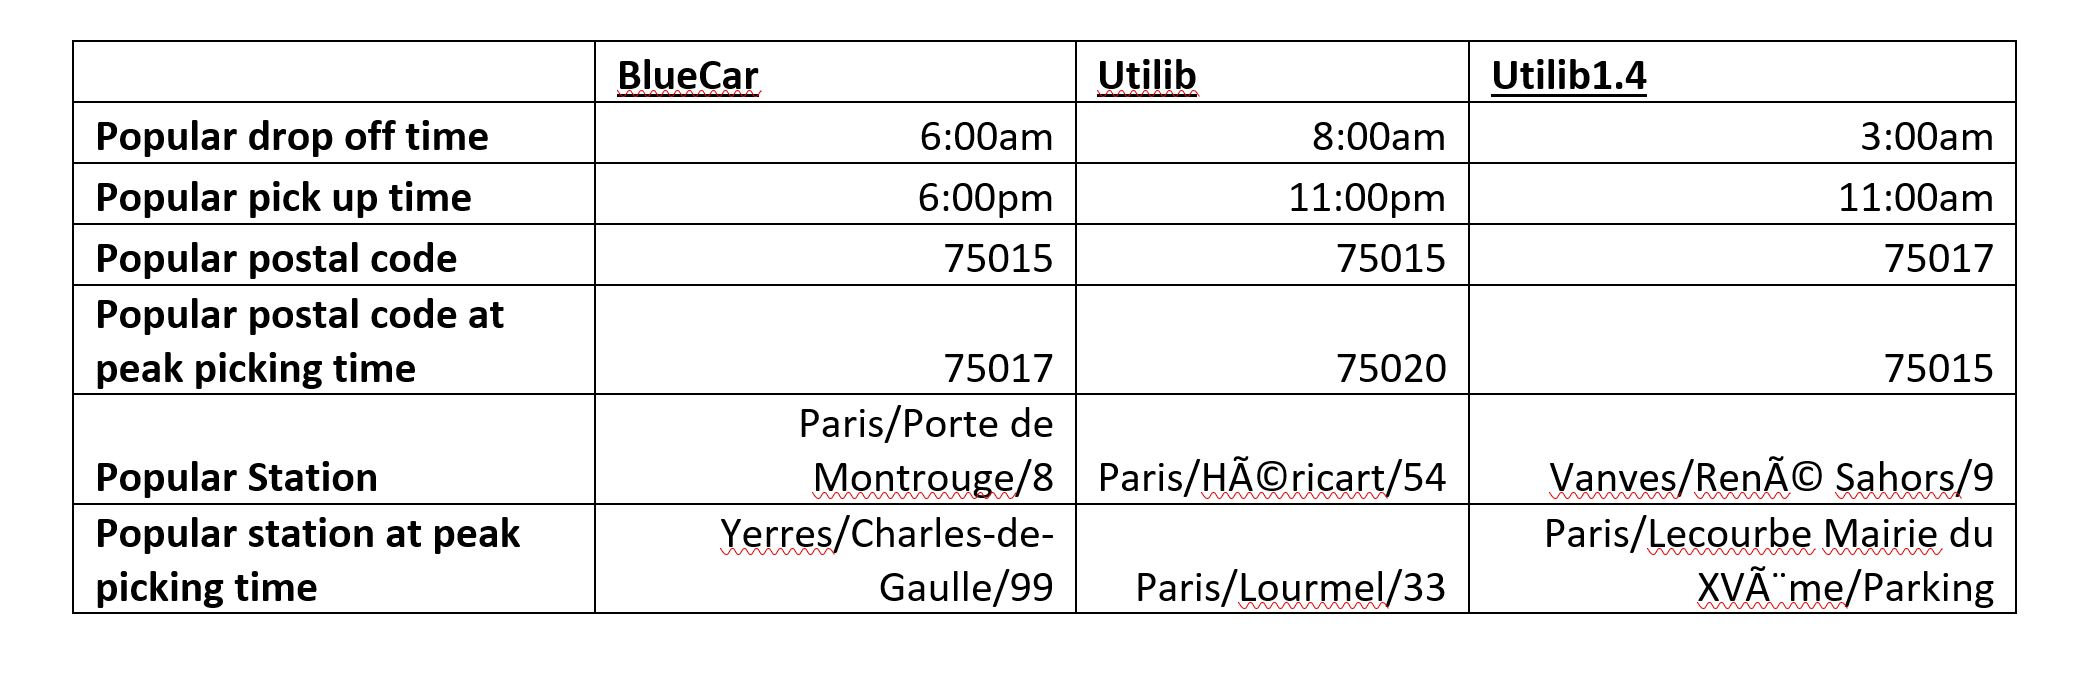

#RECOMMENDATION

From the analysis above we can recommend:


1.   Utilib14 marketting campaigns should target both taxis and young individuals
2.   Bluecars should have their own designated slots and more charging points.
3.   More marketting should be done on the Utilib vehicles.
4.   There should be more marketting to the areas that have little to no activity on the sharing service of the companies vehicles.
5.   There should be tariffs made on the bluecar on the peak usage hours and some subsidization done on the utilib in order to even their income stream and allow for further expansion.



#EVALUATION

A suggestion is made on better collection of data and better description of said data so as to get a more clear analysis on the way forward with this business model.